In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 미세먼지 데이터 불러오기

In [61]:
m_fine_dust = pd.read_csv("D:/humanda/project/1st_miniproject/Mook/m_fine_dust.csv")

In [ ]:
m_fine_dust.info()

,date,fine_dust(㎍/㎥),grade,day_type,season,year
0,2021-01-01,36.0,normal,weekend,Winter,2021
1,2021-01-02,43.0,normal,weekend,Winter,2021
2,2021-01-03,47.0,normal,weekend,Winter,2021
3,2021-01-04,50.0,normal,weekday,Winter,2021
4,2021-01-05,37.0,normal,weekday,Winter,2021
...,...,...,...,...,...,...
1324,2024-10-25,29.0,good,weekday,Fall,2024
1325,2024-10-26,26.0,good,weekend,Fall,2024
1326,2024-10-27,27.0,good,weekend,Fall,2024
1327,2024-10-28,38.0,normal,weekday,Fall,2024


In [63]:
from pandas.api.types import CategoricalDtype
c_grade = ['good', 'normal', 'bad', 'very_bad']
c_grade1 = CategoricalDtype(categories = c_grade, ordered = True)

c_season = ["Spring", "Summer", "Fall", "Winter"]
c_season1 = CategoricalDtype(categories = c_season, ordered = True)

m_fine_dust["grade"] = m_fine_dust["grade"].astype(c_grade1)
m_fine_dust["season"] = m_fine_dust["season"].astype(c_season1)
m_fine_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   date            1329 non-null   object  
 1   fine_dust(㎍/㎥)  1329 non-null   float64 
 2   grade           1323 non-null   category
 3   day_type        1329 non-null   object  
 4   season          1329 non-null   category
 5   year            1329 non-null   int64   
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 44.7+ KB


In [64]:
m_fine_dust['date'] = pd.to_datetime(m_fine_dust['date'])

In [65]:
m_fine_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1329 non-null   datetime64[ns]
 1   fine_dust(㎍/㎥)  1329 non-null   float64       
 2   grade           1323 non-null   category      
 3   day_type        1329 non-null   object        
 4   season          1329 non-null   category      
 5   year            1329 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 44.7+ KB


# 버스, 지하철 데이터 불러오기

In [66]:
transportation_bus = pd.read_csv("D:/humanda/project/1st_miniproject/Mook/transportation_bus.csv", encoding='cp949')
transportation_train = pd.read_csv("D:/humanda/project/1st_miniproject/Mook/transportation_train.csv", encoding='cp949')

In [67]:
transportation_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1019 non-null   object 
 1   total_passenger     1019 non-null   float64
 2   commute_passenger   1019 non-null   float64
 3   other_passenger     1019 non-null   float64
 4   holiday_or_weekend  1019 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 39.9+ KB


In [68]:
transportation_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1020 non-null   object 
 1   total_passenger     1020 non-null   float64
 2   commute_passenger   1020 non-null   float64
 3   other_passenger     1020 non-null   float64
 4   holiday_or_weekend  1020 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 40.0+ KB


In [69]:
transportation_bus['date'] = pd.to_datetime(transportation_bus['date'])
transportation_train['date'] = pd.to_datetime(transportation_train['date'])

# 기상 데이터 불러오기

In [70]:
weather = pd.read_csv("D:/humanda/project/1st_miniproject/Mook/weather_data.csv")

In [71]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1399 non-null   int64  
 1   station_id           1399 non-null   int64  
 2   station_name         1399 non-null   object 
 3   date_time            1399 non-null   object 
 4   avg_temp             1399 non-null   float64
 5   min_temp             1398 non-null   float64
 6   max_temp             1399 non-null   float64
 7   daily_precipitation  591 non-null    float64
 8   avg_wind_speed       1394 non-null   float64
 9   daily_snow_depth     92 non-null     float64
dtypes: float64(6), int64(2), object(2)
memory usage: 109.4+ KB


In [72]:
weather

,Unnamed: 0,station_id,station_name,date_time,avg_temp,min_temp,max_temp,daily_precipitation,avg_wind_speed,daily_snow_depth
0,0,108,서울,2021-01-01,-4.2,-9.8,1.6,NaN,2.0,NaN
1,1,108,서울,2021-01-02,-5.0,-8.4,-1.4,NaN,2.6,NaN
2,2,108,서울,2021-01-03,-5.6,-9.1,-2.0,NaN,2.0,NaN
3,3,108,서울,2021-01-04,-3.5,-8.4,0.3,0.0,1.7,0.0
4,4,108,서울,2021-01-05,-5.5,-9.9,-2.1,0.0,2.9,0.0
...,...,...,...,...,...,...,...,...,...,...
1394,1394,108,서울,2024-10-26,17.0,10.7,24.0,NaN,1.8,NaN
1395,1395,108,서울,2024-10-27,16.0,14.0,18.8,0.0,1.6,NaN
1396,1396,108,서울,2024-10-28,15.7,12.3,20.4,0.0,2.1,NaN
1397,1397,108,서울,2024-10-29,15.0,13.4,18.3,0.0,2.3,NaN


In [73]:
weather = weather[["date_time", "avg_temp", "daily_precipitation", "avg_wind_speed", "daily_snow_depth"]]

In [74]:
weather = weather.rename(columns={"date_time": "date"})

In [75]:
weather["date"] = pd.to_datetime(weather["date"])

In [76]:
weather = weather.fillna(0)

In [77]:
weather

,date,avg_temp,daily_precipitation,avg_wind_speed,daily_snow_depth
0,2021-01-01,-4.2,0.0,2.0,0.0
1,2021-01-02,-5.0,0.0,2.6,0.0
2,2021-01-03,-5.6,0.0,2.0,0.0
3,2021-01-04,-3.5,0.0,1.7,0.0
4,2021-01-05,-5.5,0.0,2.9,0.0
...,...,...,...,...,...
1394,2024-10-26,17.0,0.0,1.8,0.0
1395,2024-10-27,16.0,0.0,1.6,0.0
1396,2024-10-28,15.7,0.0,2.1,0.0
1397,2024-10-29,15.0,0.0,2.3,0.0


# 불러온 데이터들 합치기

In [78]:
df_bus = transportation_bus.merge(m_fine_dust, on='date').merge(weather, on='date')
df_train = transportation_train.merge(m_fine_dust, on='date').merge(weather, on='date')

In [149]:
a = weather.merge(m_fine_dust, on='date')

In [150]:
a

,date,avg_temp,daily_precipitation,avg_wind_speed,daily_snow_depth,fine_dust(㎍/㎥),grade,day_type,season,year
0,2021-01-01,-4.2,0.0,2.0,0.0,36.0,normal,weekend,Winter,2021
1,2021-01-02,-5.0,0.0,2.6,0.0,43.0,normal,weekend,Winter,2021
2,2021-01-03,-5.6,0.0,2.0,0.0,47.0,normal,weekend,Winter,2021
3,2021-01-04,-3.5,0.0,1.7,0.0,50.0,normal,weekday,Winter,2021
4,2021-01-05,-5.5,0.0,2.9,0.0,37.0,normal,weekday,Winter,2021
...,...,...,...,...,...,...,...,...,...,...
1324,2024-10-25,14.9,0.0,1.7,0.0,29.0,good,weekday,Fall,2024
1325,2024-10-26,17.0,0.0,1.8,0.0,26.0,good,weekend,Fall,2024
1326,2024-10-27,16.0,0.0,1.6,0.0,27.0,good,weekend,Fall,2024
1327,2024-10-28,15.7,0.0,2.1,0.0,38.0,normal,weekday,Fall,2024


In [79]:
df_bus

,date,total_passenger,commute_passenger,other_passenger,holiday_or_weekend,fine_dust(㎍/㎥),grade,day_type,season,year,avg_temp,daily_precipitation,avg_wind_speed,daily_snow_depth
0,2022-01-01,1858954.0,519623.0,1339331.0,1,34.0,normal,weekend,Winter,2022,-4.3,0.0,1.5,0.0
1,2022-01-02,2048632.0,579340.0,1469292.0,1,42.0,normal,weekend,Winter,2022,-1.3,0.3,2.3,0.5
2,2022-01-03,4028715.0,1793953.0,2234762.0,0,28.0,good,weekday,Winter,2022,-1.9,0.0,1.8,0.0
3,2022-01-04,4151012.0,1823826.0,2327186.0,0,37.0,normal,weekday,Winter,2022,-2.5,0.0,2.4,0.0
4,2022-01-05,4151012.0,1823826.0,2327186.0,0,52.0,normal,weekday,Winter,2022,-2.8,0.0,1.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2024-10-25,5183112.0,2064377.0,3118735.0,0,29.0,good,weekday,Fall,2024,14.9,0.0,1.7,0.0
956,2024-10-26,4026928.0,1194663.0,2832265.0,1,26.0,good,weekend,Fall,2024,17.0,0.0,1.8,0.0
957,2024-10-27,2991012.0,860873.0,2130139.0,1,27.0,good,weekend,Fall,2024,16.0,0.0,1.6,0.0
958,2024-10-28,4900706.0,2052646.0,2848060.0,0,38.0,normal,weekday,Fall,2024,15.7,0.0,2.1,0.0


In [80]:
df_train

,date,total_passenger,commute_passenger,other_passenger,holiday_or_weekend,fine_dust(㎍/㎥),grade,day_type,season,year,avg_temp,daily_precipitation,avg_wind_speed,daily_snow_depth
0,2022-01-01,1792725.0,502533.0,1290192.0,1,34.0,normal,weekend,Winter,2022,-4.3,0.0,1.5,0.0
1,2022-01-02,2053208.0,608212.0,1444996.0,1,42.0,normal,weekend,Winter,2022,-1.3,0.3,2.3,0.5
2,2022-01-03,4487668.0,2285899.0,2201769.0,0,28.0,good,weekday,Winter,2022,-1.9,0.0,1.8,0.0
3,2022-01-04,4648008.0,2316071.0,2331937.0,0,37.0,normal,weekday,Winter,2022,-2.5,0.0,2.4,0.0
4,2022-01-05,4648008.0,2316071.0,2331937.0,0,52.0,normal,weekday,Winter,2022,-2.8,0.0,1.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,2024-10-25,6077760.0,2618610.0,3459150.0,0,29.0,good,weekday,Fall,2024,14.9,0.0,1.7,0.0
957,2024-10-26,4561254.0,1356948.0,3204306.0,1,26.0,good,weekend,Fall,2024,17.0,0.0,1.8,0.0
958,2024-10-27,3490702.0,979266.0,2511436.0,1,27.0,good,weekend,Fall,2024,16.0,0.0,1.6,0.0
959,2024-10-28,5645227.0,2635818.0,3009409.0,0,38.0,normal,weekday,Fall,2024,15.7,0.0,2.1,0.0


# 버스 총 승객수에 관하여 상관계수 및 히트맵으로 시각화

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


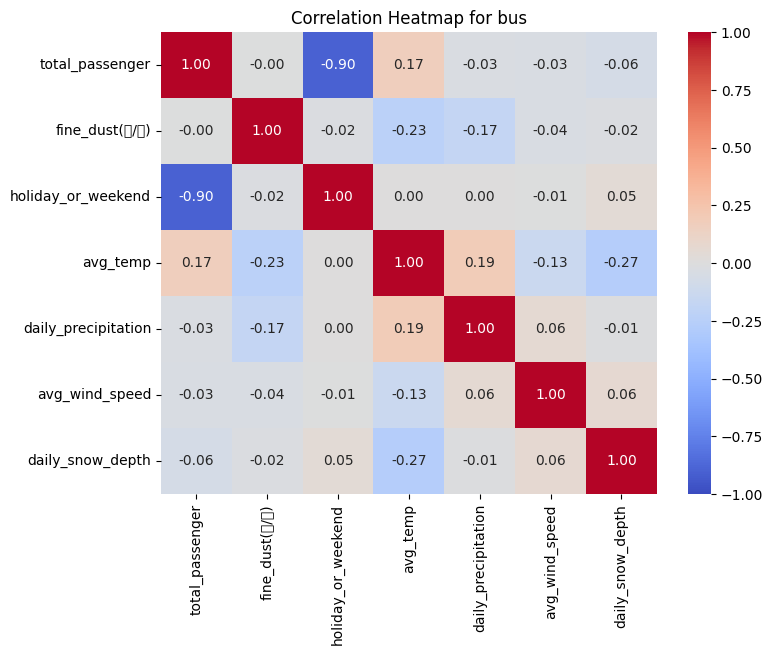

Correlation with total_passenger:
total_passenger        1.000000
fine_dust(㎍/㎥)        -0.002574
holiday_or_weekend    -0.898439
avg_temp               0.165775
daily_precipitation   -0.026099
avg_wind_speed        -0.032656
daily_snow_depth      -0.064851
Name: total_passenger, dtype: float64


In [119]:
columns_of_interest = ['total_passenger', 'fine_dust(㎍/㎥)','holiday_or_weekend', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']
df_selected = df_bus[columns_of_interest]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bus")

plt.show()

total_passenger_correlation = correlation_matrix['total_passenger']
print("Correlation with total_passenger:")
print(total_passenger_correlation)

# 지하철 총 승객수에 관하여 상관계수 및 히트맵 시각화

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


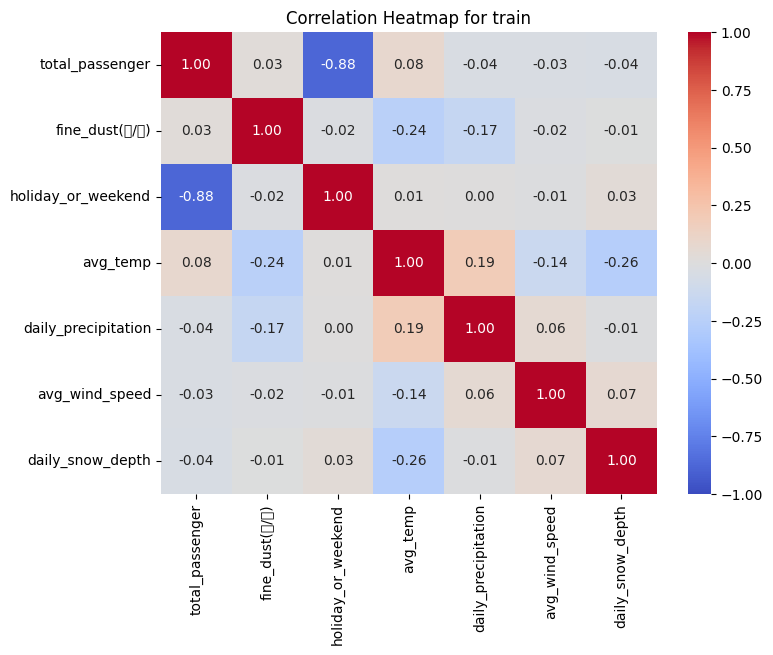

Correlation with total_passenger:
total_passenger        1.000000
fine_dust(㎍/㎥)         0.030027
holiday_or_weekend    -0.876039
avg_temp               0.078269
daily_precipitation   -0.036986
avg_wind_speed        -0.034312
daily_snow_depth      -0.039683
Name: total_passenger, dtype: float64


In [120]:
columns_of_interest = ['total_passenger', 'fine_dust(㎍/㎥)','holiday_or_weekend', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']
df_selected = df_train[columns_of_interest]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for train")

plt.show()

total_passenger_correlation = correlation_matrix['total_passenger']
print("Correlation with total_passenger:")
print(total_passenger_correlation)

# 주중(공휴일 제외)과 주말(공휴일 포함)로 나누기
주중과 주말의 승객수가 많이 차이나서 정확한 분석이 어려움

In [83]:
df_bus_weekday = df_bus[df_bus["holiday_or_weekend"] == 0]
df_bus_weekend = df_bus[df_bus["holiday_or_weekend"] == 1]
df_train_weekday = df_train[df_train["holiday_or_weekend"] == 0]
df_train_weekend = df_train[df_train["holiday_or_weekend"] == 1]


# 주중과 주말로 나눈 데이터 상관계수 및 시각화

# 버스(주중), 버스(주말)

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\Ap

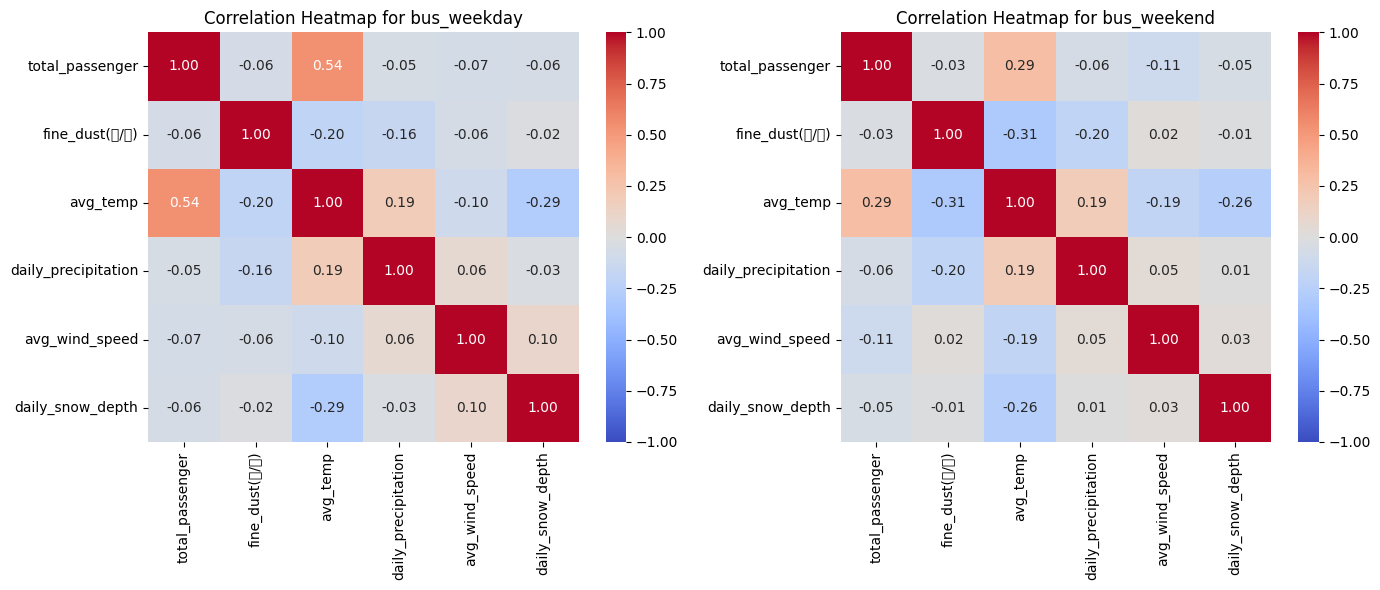

In [84]:
columns_of_interest = ['total_passenger', 'fine_dust(㎍/㎥)', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']


bus_selected_day = df_bus_weekday[columns_of_interest]
bus_selected_end = df_bus_weekend[columns_of_interest]

bus_correlation_matrix_day = bus_selected_day.corr()
bus_correlation_matrix_end = bus_selected_end.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(bus_correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bus_weekday")

plt.subplot(1, 2, 2)
sns.heatmap(bus_correlation_matrix_end, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bus_weekend")

plt.tight_layout()
plt.show()

# 버스(주중), 버스(주말) total_passenger 상관계수

In [85]:
bus_total_correlation_day = bus_correlation_matrix_day['total_passenger']
bus_total_correlation_end = bus_correlation_matrix_end['total_passenger']


print("Correlation with bus_total_passenger_day:")
print(bus_total_correlation_day)
print()
print("Correlation with bus_total_passenger_end:")
print(bus_total_correlation_end)

Correlation with bus_total_passenger_day:
total_passenger        1.000000
fine_dust(㎍/㎥)        -0.064749
avg_temp               0.544745
daily_precipitation   -0.053298
avg_wind_speed        -0.072992
daily_snow_depth      -0.058078
Name: total_passenger, dtype: float64

Correlation with bus_total_passenger_end:
total_passenger        1.000000
fine_dust(㎍/㎥)        -0.029311
avg_temp               0.291765
daily_precipitation   -0.059935
avg_wind_speed        -0.114291
daily_snow_depth      -0.054355
Name: total_passenger, dtype: float64


# 산점도 확인
total_passenger와 상관관계가 높게 나온 Avg_Temp와 산점도 확인

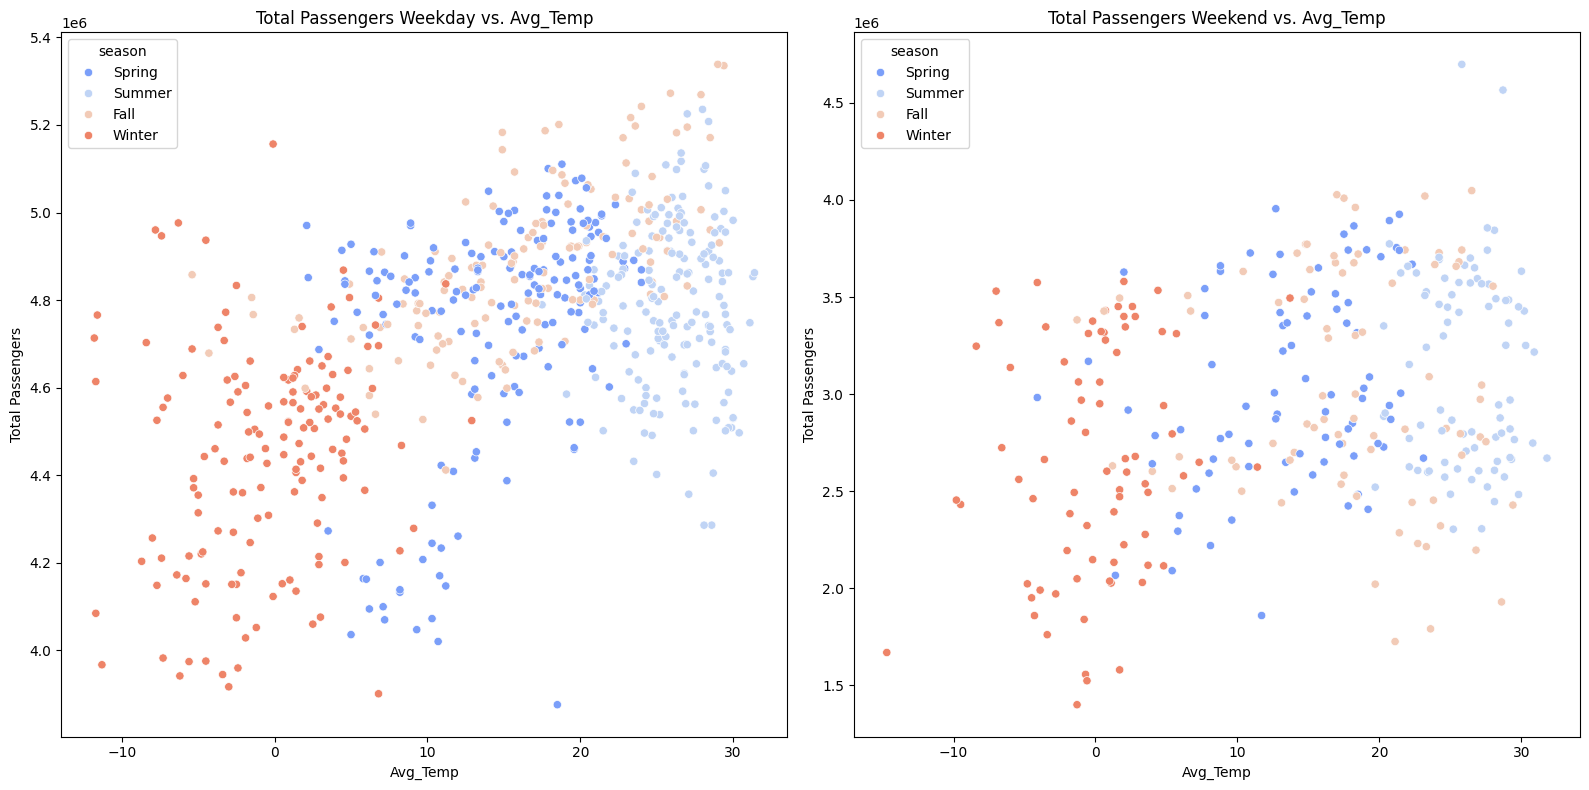

In [86]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_bus_weekday, x='avg_temp', y='total_passenger', hue='season', palette='coolwarm')
plt.title('Total Passengers Weekday vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Total Passengers')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_bus_weekend, x='avg_temp', y='total_passenger', hue='season', palette='coolwarm')
plt.title('Total Passengers Weekend vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Total Passengers')

plt.tight_layout()
plt.show()

# 지하철(주중), 지하철(주말)

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\Ap

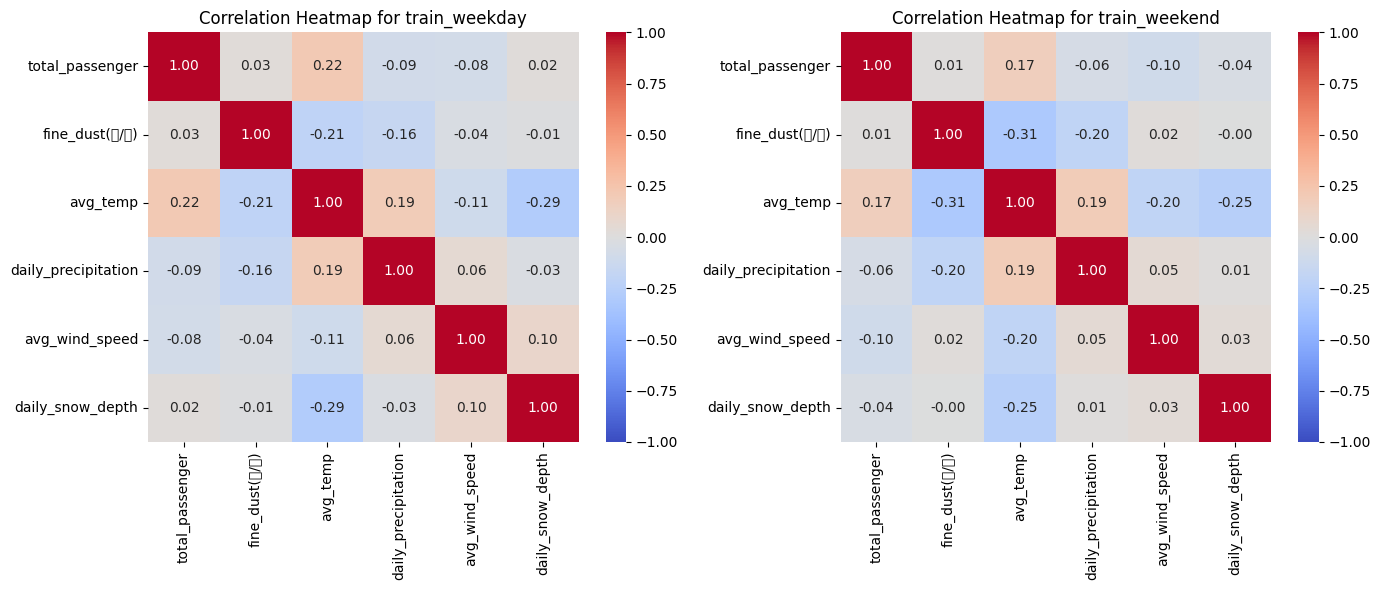

In [87]:
columns_of_interest = ['total_passenger', 'fine_dust(㎍/㎥)', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']


train_selected_day = df_train_weekday[columns_of_interest]
train_selected_end = df_train_weekend[columns_of_interest]

train_correlation_matrix_day = train_selected_day.corr()
train_correlation_matrix_end = train_selected_end.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for train_weekday")

plt.subplot(1, 2, 2)
sns.heatmap(train_correlation_matrix_end, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for train_weekend")

plt.tight_layout()
plt.show()

# 지하철(주중), 지하철(주말) total_passenger상관계수

In [88]:
train_total_correlation_day = train_correlation_matrix_day['total_passenger']
train_total_correlation_end = train_correlation_matrix_end['total_passenger']


print("Correlation with train_total_passenger_day:")
print(train_total_correlation_day)
print()
print("Correlation with train_total_passenger_end:")
print(train_total_correlation_end)

Correlation with train_total_passenger_day:
total_passenger        1.000000
fine_dust(㎍/㎥)         0.027496
avg_temp               0.217585
daily_precipitation   -0.091260
avg_wind_speed        -0.083406
daily_snow_depth       0.016015
Name: total_passenger, dtype: float64

Correlation with train_total_passenger_end:
total_passenger        1.000000
fine_dust(㎍/㎥)         0.014039
avg_temp               0.167164
daily_precipitation   -0.055099
avg_wind_speed        -0.098247
daily_snow_depth      -0.043809
Name: total_passenger, dtype: float64


# 지하철 산점도

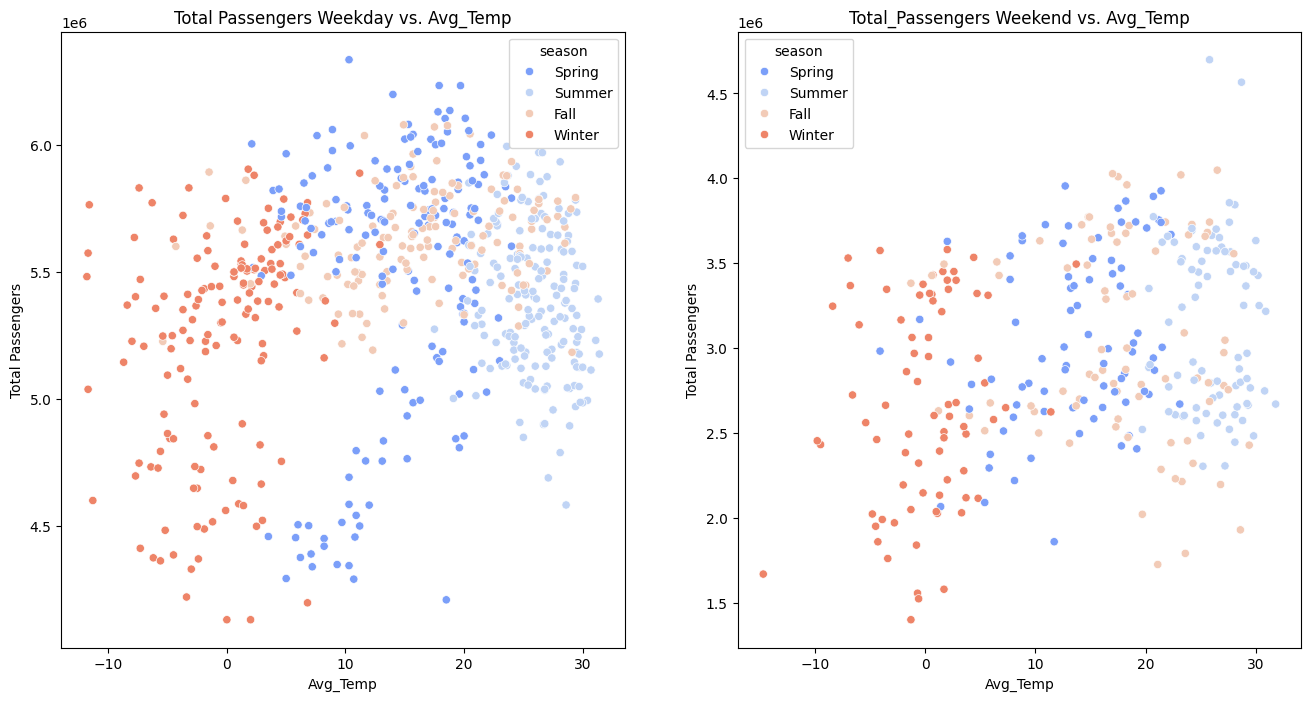

In [89]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_train_weekday, x='avg_temp', y='total_passenger', hue='season', palette='coolwarm')
plt.title('Total Passengers Weekday vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Total Passengers')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_bus_weekend, x='avg_temp', y='total_passenger', hue='season', palette='coolwarm')
plt.title('Total_Passengers Weekend vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Total Passengers')
plt.show()

# 버스(출퇴근 시간대) 승객 수 상관분석

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\Ap

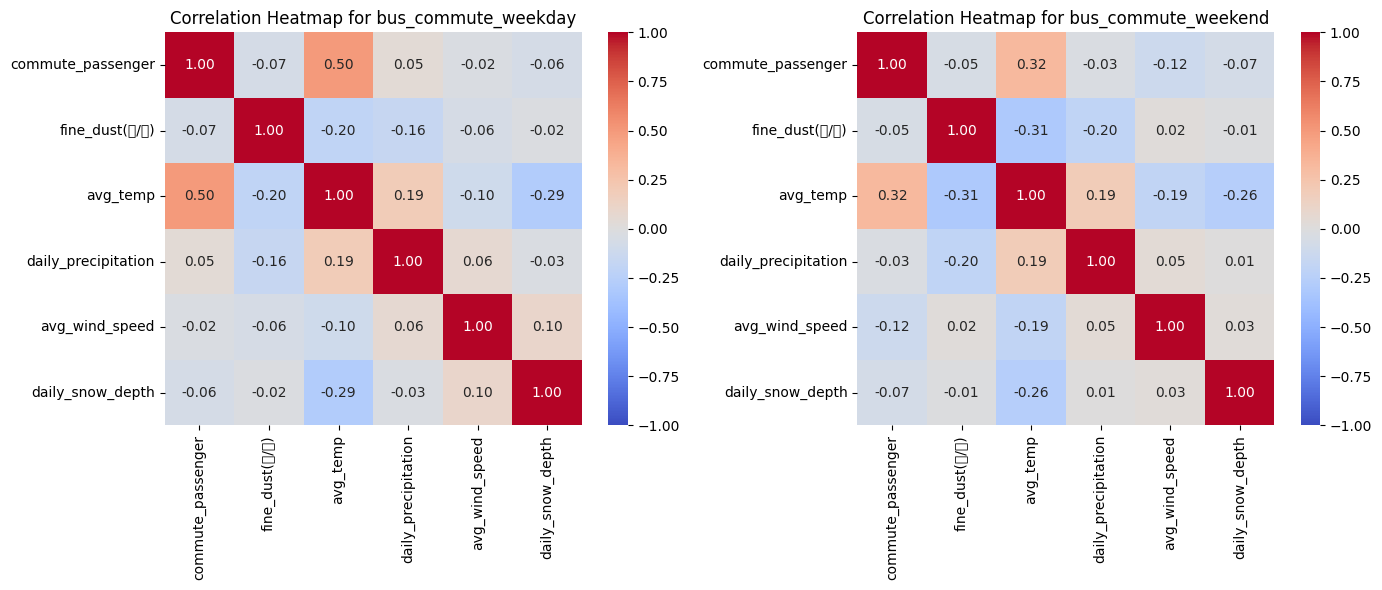

In [90]:
columns_of_interest = ['commute_passenger', 'fine_dust(㎍/㎥)', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']


bus_selected_day = df_bus_weekday[columns_of_interest]
bus_selected_end = df_bus_weekend[columns_of_interest]

bus_correlation_matrix_day = bus_selected_day.corr()
bus_correlation_matrix_end = bus_selected_end.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(bus_correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bus_commute_weekday")

plt.subplot(1, 2, 2)
sns.heatmap(bus_correlation_matrix_end, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bus_commute_weekend")

plt.tight_layout()
plt.show()

# 산점도

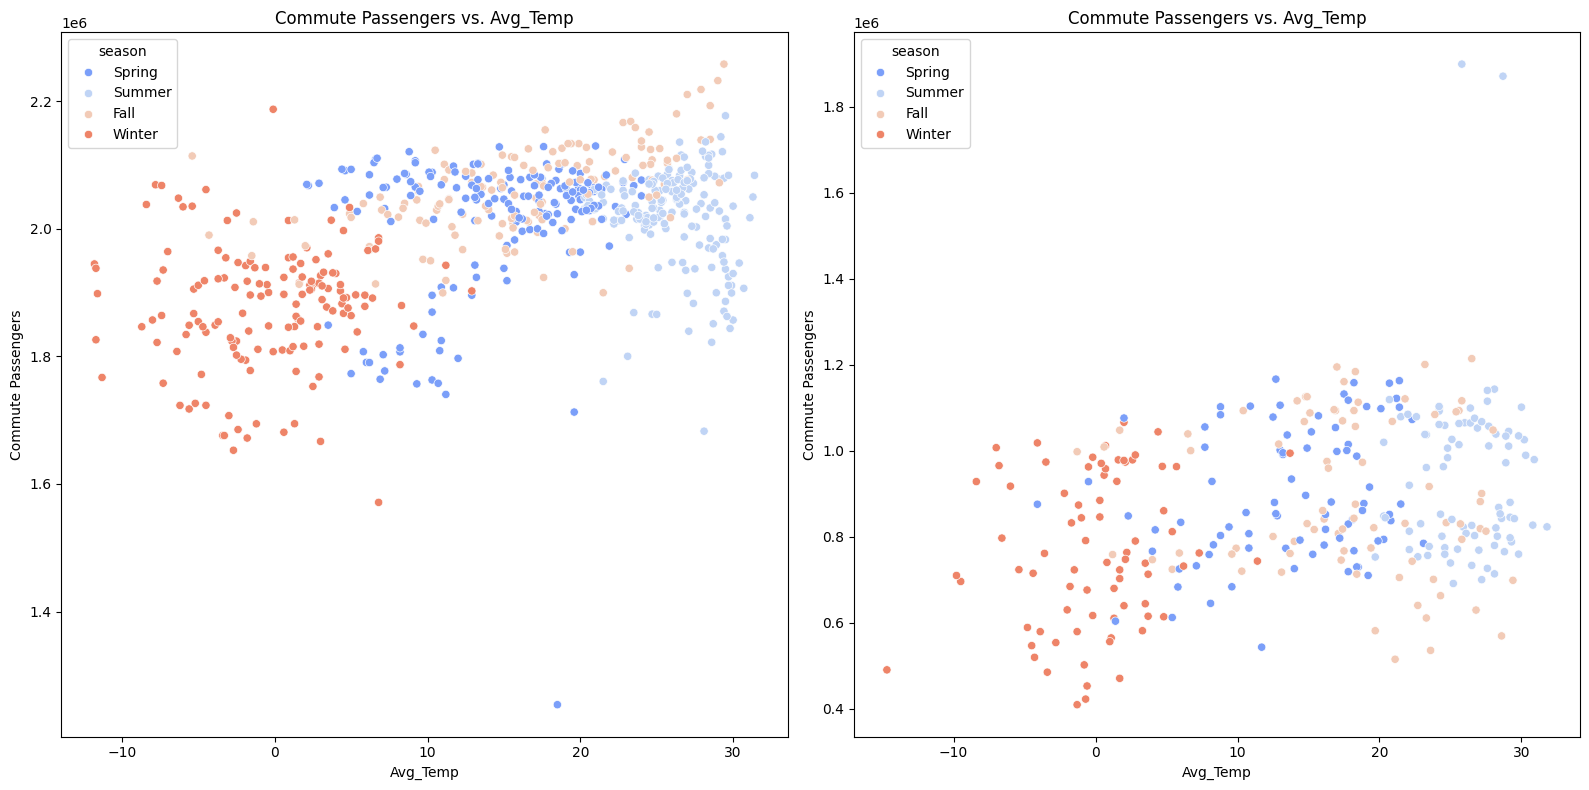

In [91]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_bus_weekday, x='avg_temp', y='commute_passenger', hue='season', palette='coolwarm')
plt.title('Commute Passengers vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Commute Passengers')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_bus_weekend, x='avg_temp', y='commute_passenger', hue='season', palette='coolwarm')
plt.title('Commute Passengers vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Commute Passengers')

plt.tight_layout()
plt.show()

# 버스(나머지 시간대) 승객 수 상관분석

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\Ap

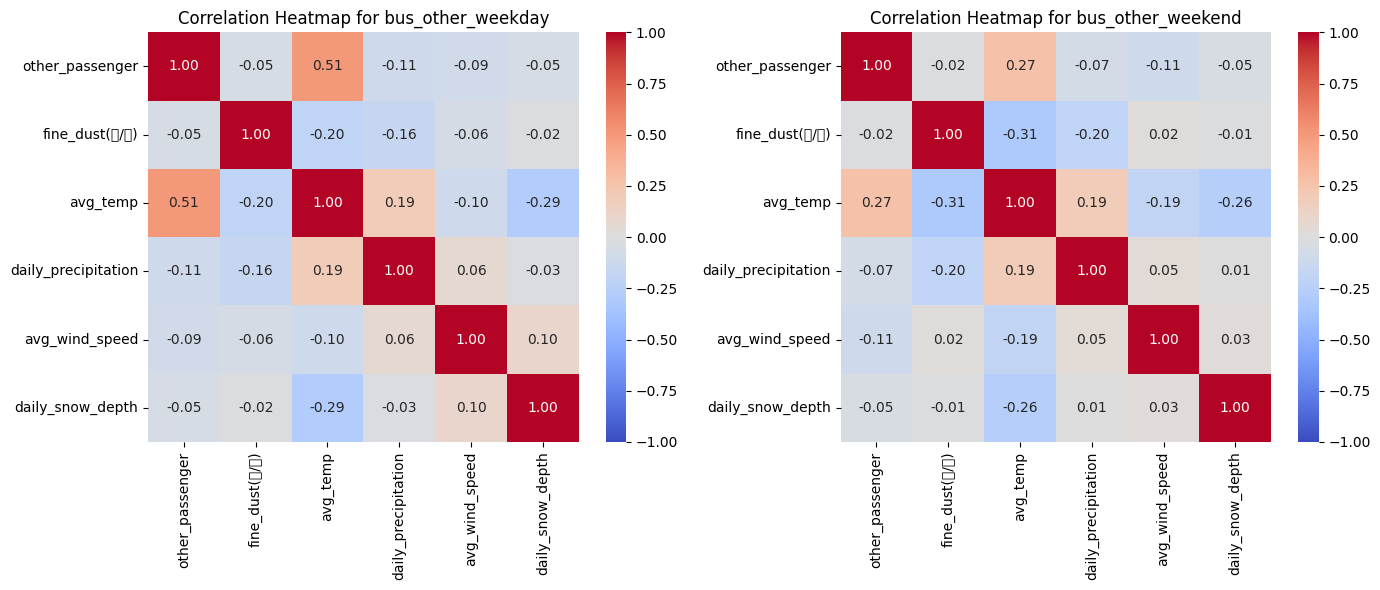

In [92]:
columns_of_interest = ['other_passenger', 'fine_dust(㎍/㎥)', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']


bus_selected_day = df_bus_weekday[columns_of_interest]
bus_selected_end = df_bus_weekend[columns_of_interest]

bus_correlation_matrix_day = bus_selected_day.corr()
bus_correlation_matrix_end = bus_selected_end.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(bus_correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bus_other_weekday")

plt.subplot(1, 2, 2)
sns.heatmap(bus_correlation_matrix_end, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bus_other_weekend")

plt.tight_layout()
plt.show()

# 산점도

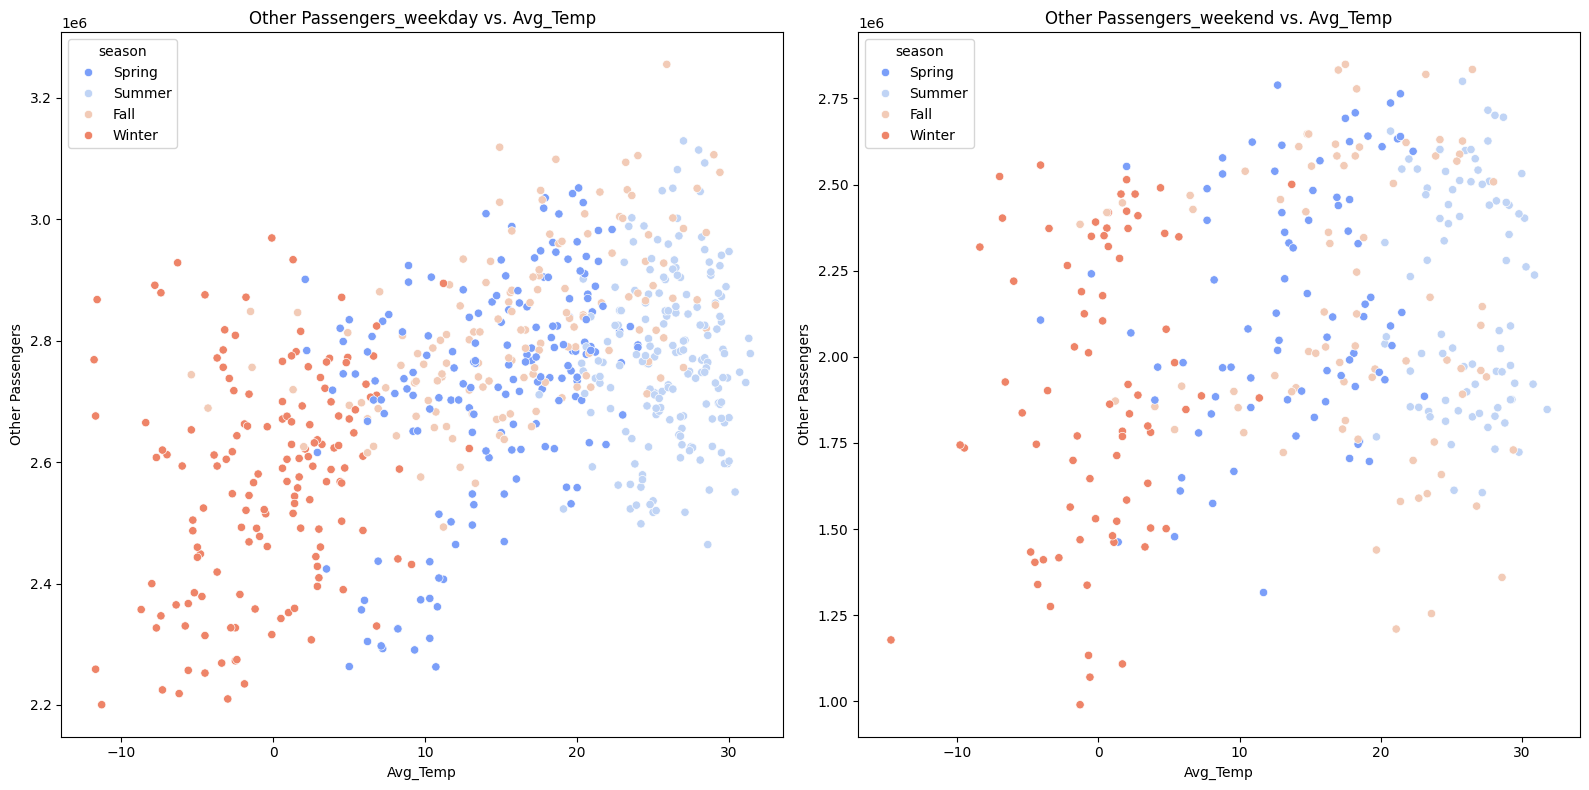

In [93]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_bus_weekday, x='avg_temp', y='other_passenger', hue='season', palette='coolwarm')
plt.title('Other Passengers_weekday vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Other Passengers')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_bus_weekend, x='avg_temp', y='other_passenger', hue='season', palette='coolwarm')
plt.title('Other Passengers_weekend vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Other Passengers')

plt.tight_layout()
plt.show()

# 지하철(출퇴근 시간대) 상관분석

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\Ap

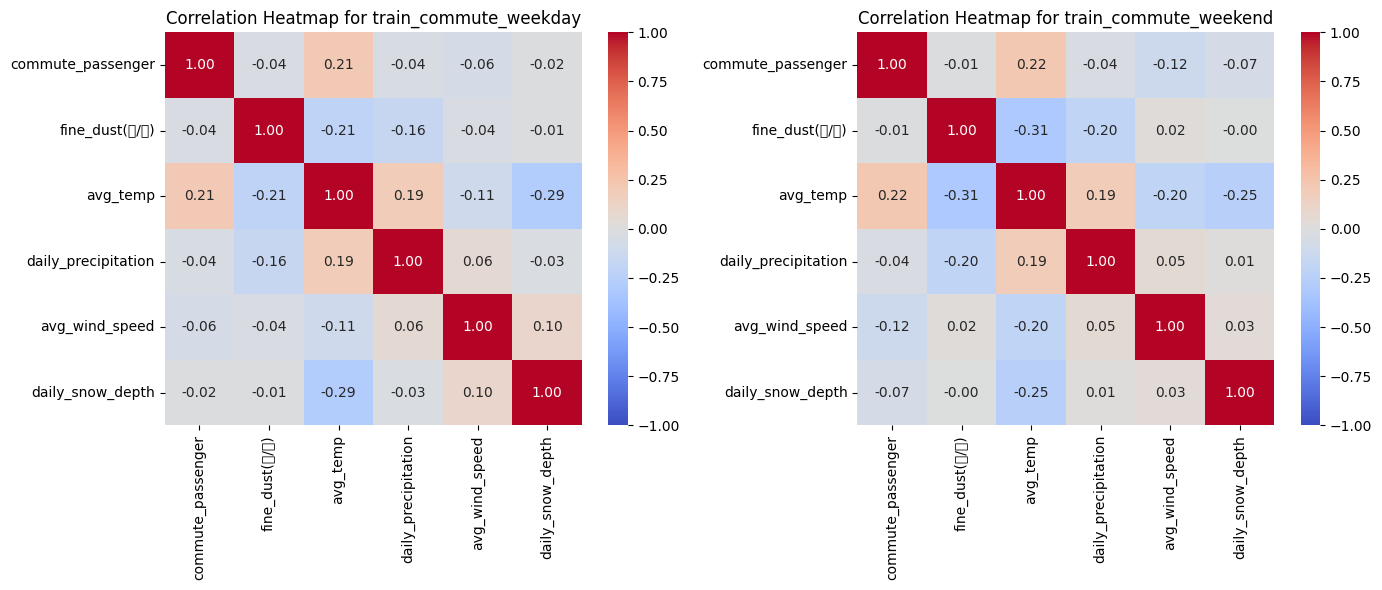

In [122]:
columns_of_interest = ['commute_passenger', 'fine_dust(㎍/㎥)', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']


train_selected_day = df_train_weekday[columns_of_interest]
train_selected_end = df_train_weekend[columns_of_interest]

train_correlation_matrix_day = train_selected_day.corr()
train_correlation_matrix_end = train_selected_end.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for train_commute_weekday")

plt.subplot(1, 2, 2)
sns.heatmap(train_correlation_matrix_end, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for train_commute_weekend")

plt.tight_layout()
plt.show()

# 산점도

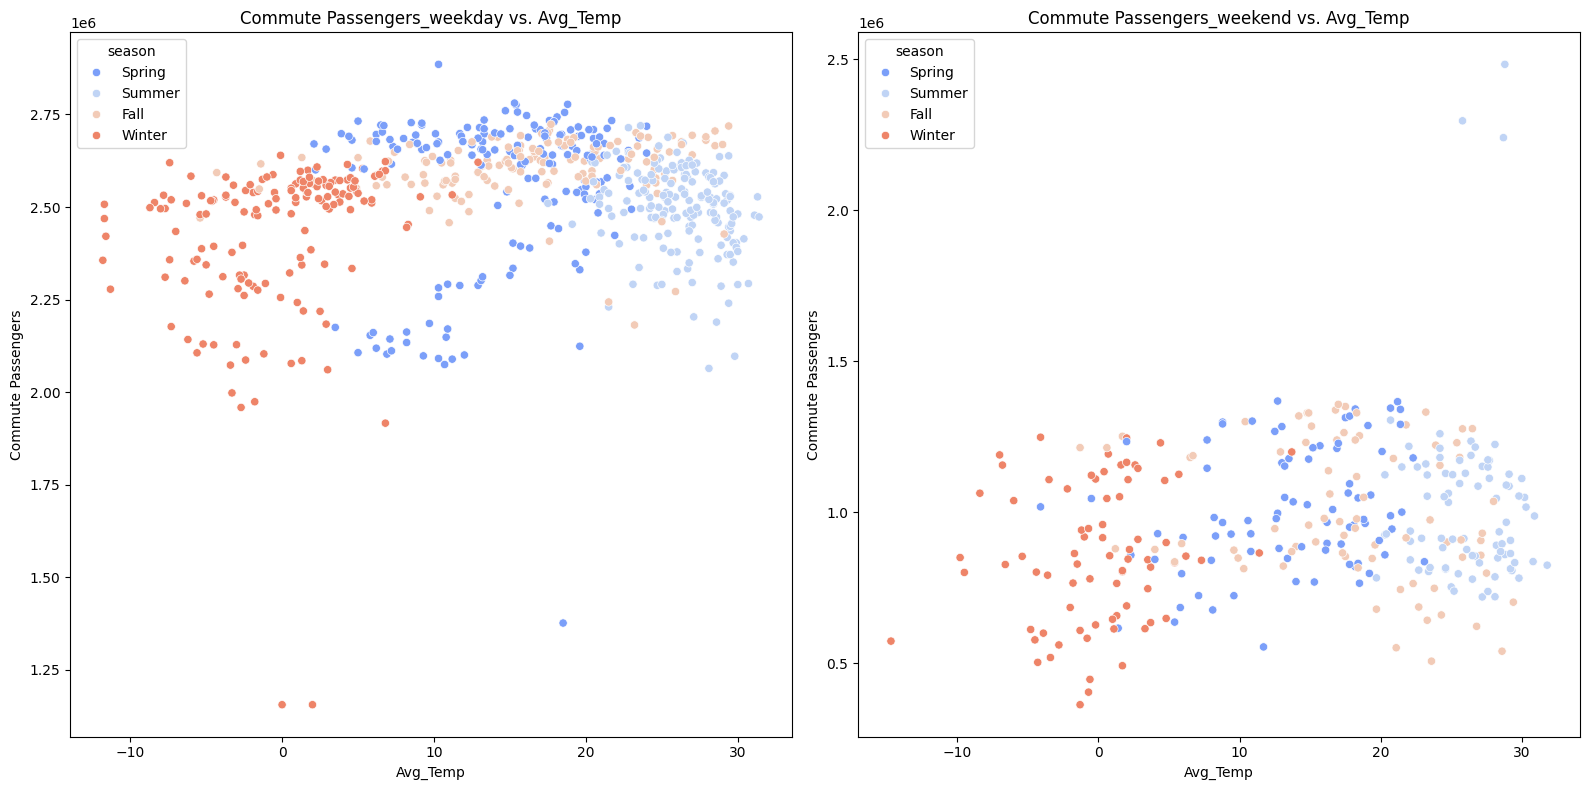

In [95]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_train_weekday, x='avg_temp', y='commute_passenger', hue='season', palette='coolwarm')
plt.title('Commute Passengers_weekday vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Commute Passengers')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_train_weekend, x='avg_temp', y='commute_passenger', hue='season', palette='coolwarm')
plt.title('Commute Passengers_weekend vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Commute Passengers')

plt.tight_layout()
plt.show()

# 지하철(나머지 시간대) 상관분석

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\Ap

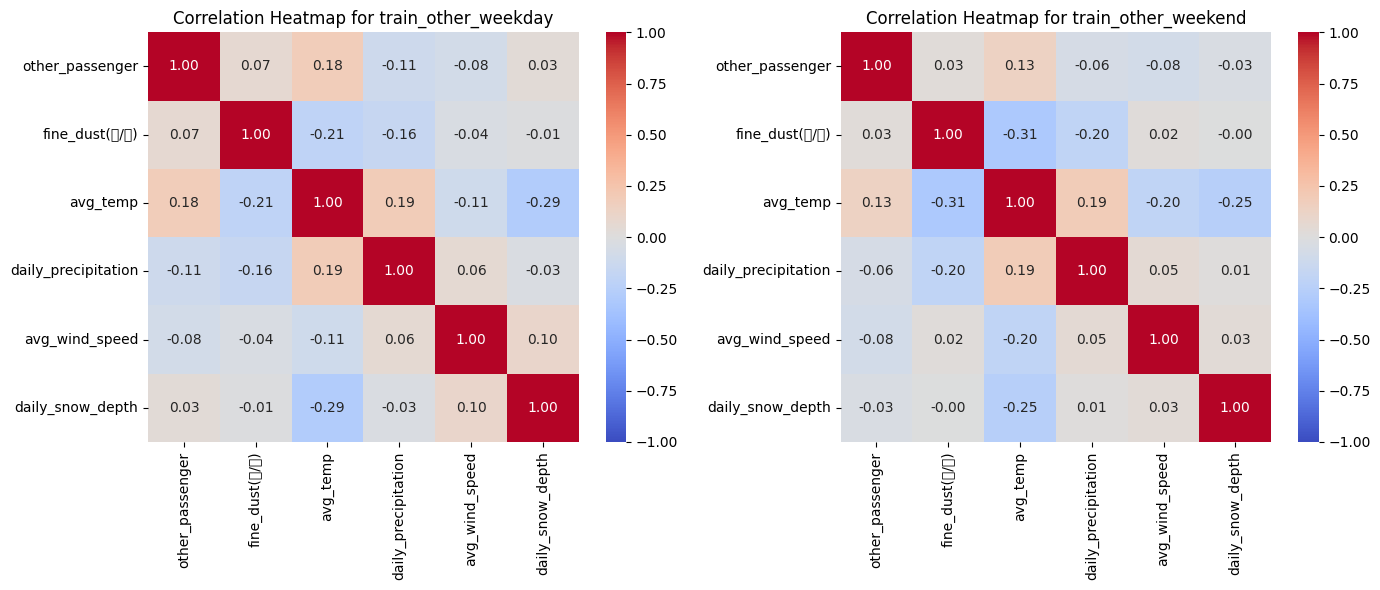

In [121]:
columns_of_interest = ['other_passenger', 'fine_dust(㎍/㎥)', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']


train_selected_day = df_train_weekday[columns_of_interest]
train_selected_end = df_train_weekend[columns_of_interest]

train_correlation_matrix_day = train_selected_day.corr()
train_correlation_matrix_end = train_selected_end.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for train_other_weekday")

plt.subplot(1, 2, 2)
sns.heatmap(train_correlation_matrix_end, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for train_other_weekend")

plt.tight_layout()
plt.show()

# 산점도

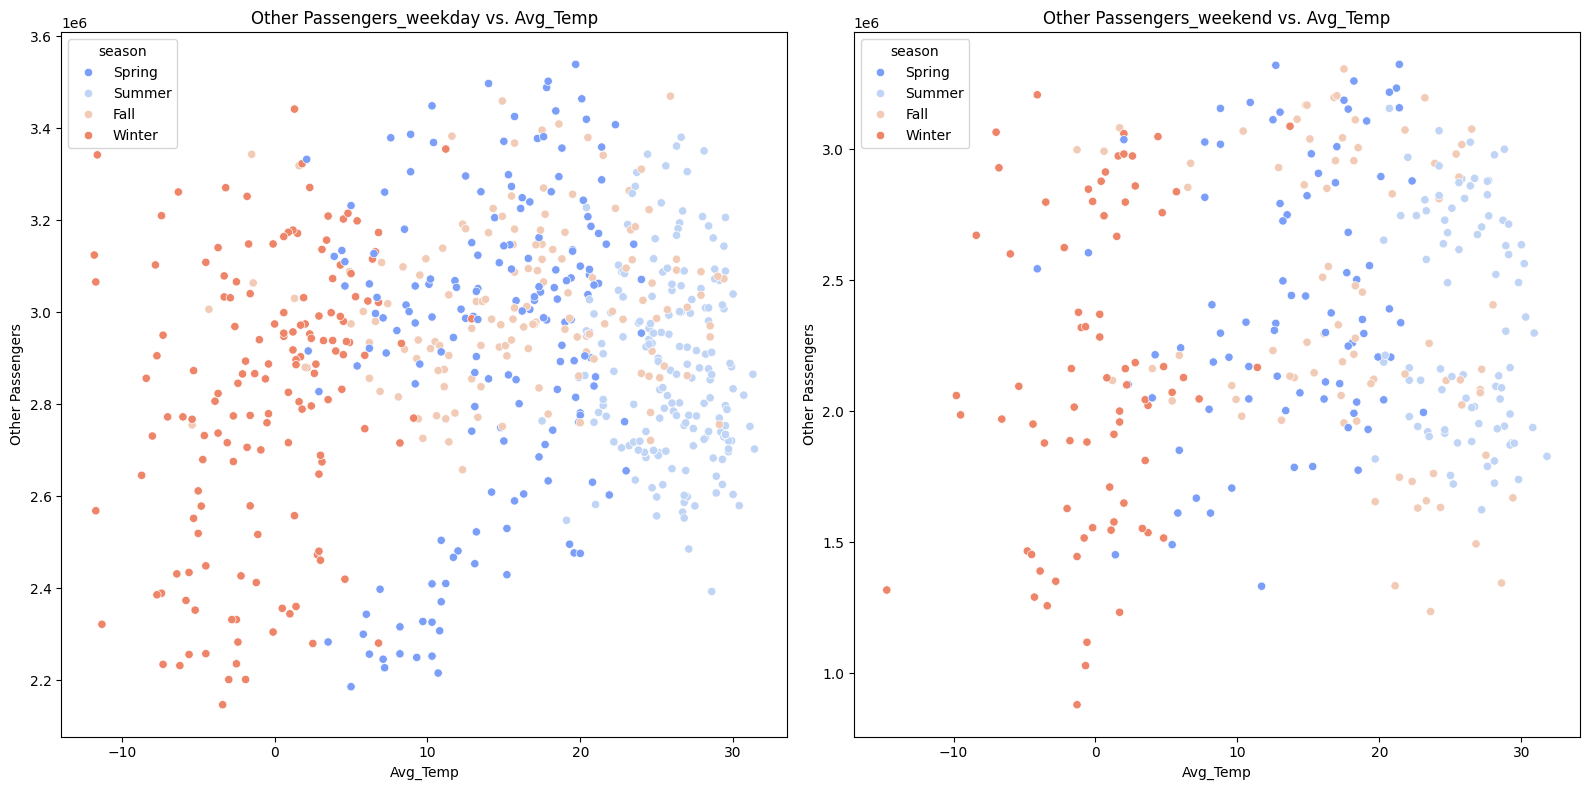

In [97]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_train_weekday, x='avg_temp', y='other_passenger', hue='season', palette='coolwarm')
plt.title('Other Passengers_weekday vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Other Passengers')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_train_weekend, x='avg_temp', y='other_passenger', hue='season', palette='coolwarm')
plt.title('Other Passengers_weekend vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Other Passengers')

plt.tight_layout()
plt.show()

In [98]:
df_bike = pd.read_csv("D:/humanda/project/1st_miniproject/Mook/merged_data_sum.csv")

In [99]:
df_bike

,대여일자,대여건수
0,2022-01-01,29181
1,2022-01-02,28912
2,2022-01-03,53569
3,2022-01-04,56342
4,2022-01-05,57409
...,...,...
1028,2024-10-26,145497
1029,2024-10-27,110957
1030,2024-10-28,159283
1031,2024-10-29,154501


In [100]:
df_bike['대여일자'] = pd.to_datetime(df_bike['대여일자'])

In [101]:
df_bike = df_bike.rename(columns={'대여일자' : 'date', '대여건수': 'total_bike'})

In [102]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1033 non-null   datetime64[ns]
 1   total_bike  1033 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 16.3 KB


In [103]:
df_date = pd.read_csv("df_date.csv")

In [104]:
df_date['date'] = pd.to_datetime(df_date['date'])

In [105]:
bike_merge = df_bike.merge(m_fine_dust, on='date').merge(weather, on='date').merge(df_date, on= 'date')

In [106]:
bike_merge

,date,total_bike,fine_dust(㎍/㎥),grade,day_type,season,year,avg_temp,daily_precipitation,avg_wind_speed,daily_snow_depth,ID,holiday_or_weekend
0,2022-01-01,29181,34.0,normal,weekend,Winter,2022,-4.3,0.0,1.5,0.0,1,1
1,2022-01-02,28912,42.0,normal,weekend,Winter,2022,-1.3,0.3,2.3,0.5,2,1
2,2022-01-03,53569,28.0,good,weekday,Winter,2022,-1.9,0.0,1.8,0.0,3,0
3,2022-01-04,56342,37.0,normal,weekday,Winter,2022,-2.5,0.0,2.4,0.0,4,0
4,2022-01-05,57409,52.0,normal,weekday,Winter,2022,-2.8,0.0,1.7,0.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2024-10-25,166458,29.0,good,weekday,Fall,2024,14.9,0.0,1.7,0.0,1029,0
967,2024-10-26,145497,26.0,good,weekend,Fall,2024,17.0,0.0,1.8,0.0,1030,1
968,2024-10-27,110957,27.0,good,weekend,Fall,2024,16.0,0.0,1.6,0.0,1031,1
969,2024-10-28,159283,38.0,normal,weekday,Fall,2024,15.7,0.0,2.1,0.0,1032,0


In [107]:
bike_merge_weekday = bike_merge[bike_merge['holiday_or_weekend'] == 0]
bike_merge_weekend = bike_merge[bike_merge['holiday_or_weekend'] == 1]

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human\Ap

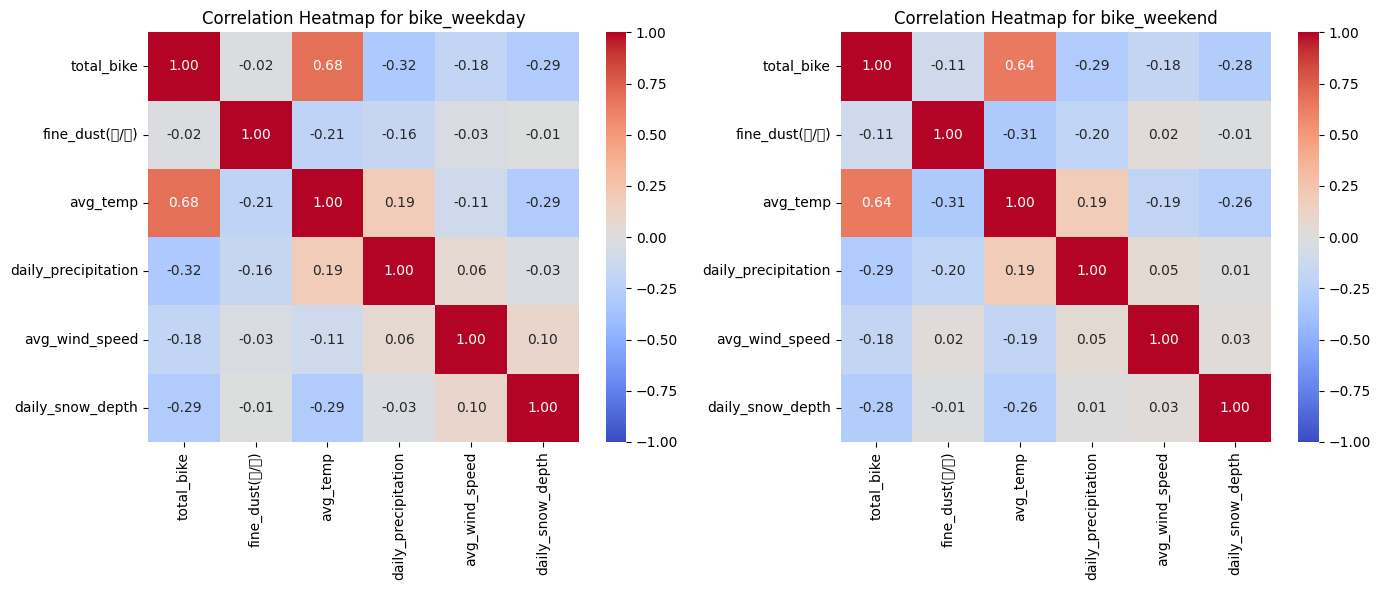

In [113]:
columns_of_interest = ['total_bike', 'fine_dust(㎍/㎥)', 'avg_temp', 'daily_precipitation', 'avg_wind_speed', 'daily_snow_depth']


bus_selected_day = bike_merge_weekday[columns_of_interest]
bus_selected_end = bike_merge_weekend[columns_of_interest]

bus_correlation_matrix_day = bus_selected_day.corr()
bus_correlation_matrix_end = bus_selected_end.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(bus_correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bike_weekday")

plt.subplot(1, 2, 2)
sns.heatmap(bus_correlation_matrix_end, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for bike_weekend")

plt.tight_layout()
plt.show()

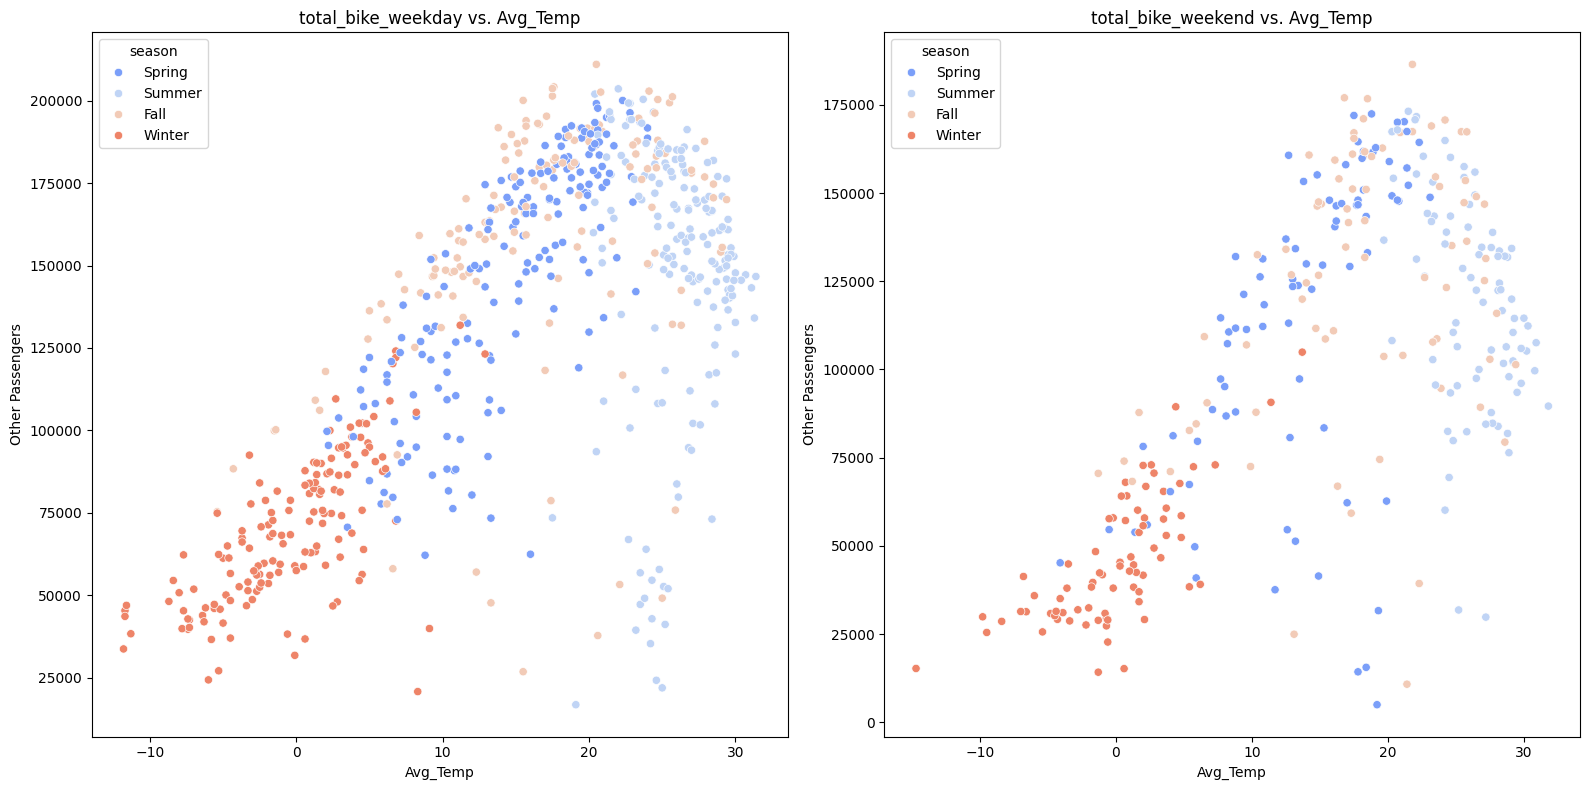

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=bike_merge_weekday, x='avg_temp', y='total_bike', hue='season', palette='coolwarm')
plt.title('total_bike_weekday vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Other Passengers')

plt.subplot(1, 2, 2)
sns.scatterplot(data=bike_merge_weekend, x='avg_temp', y='total_bike', hue='season', palette='coolwarm')
plt.title('total_bike_weekend vs. Avg_Temp')
plt.xlabel('Avg_Temp')
plt.ylabel('Other Passengers')

plt.tight_layout()
plt.show()

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


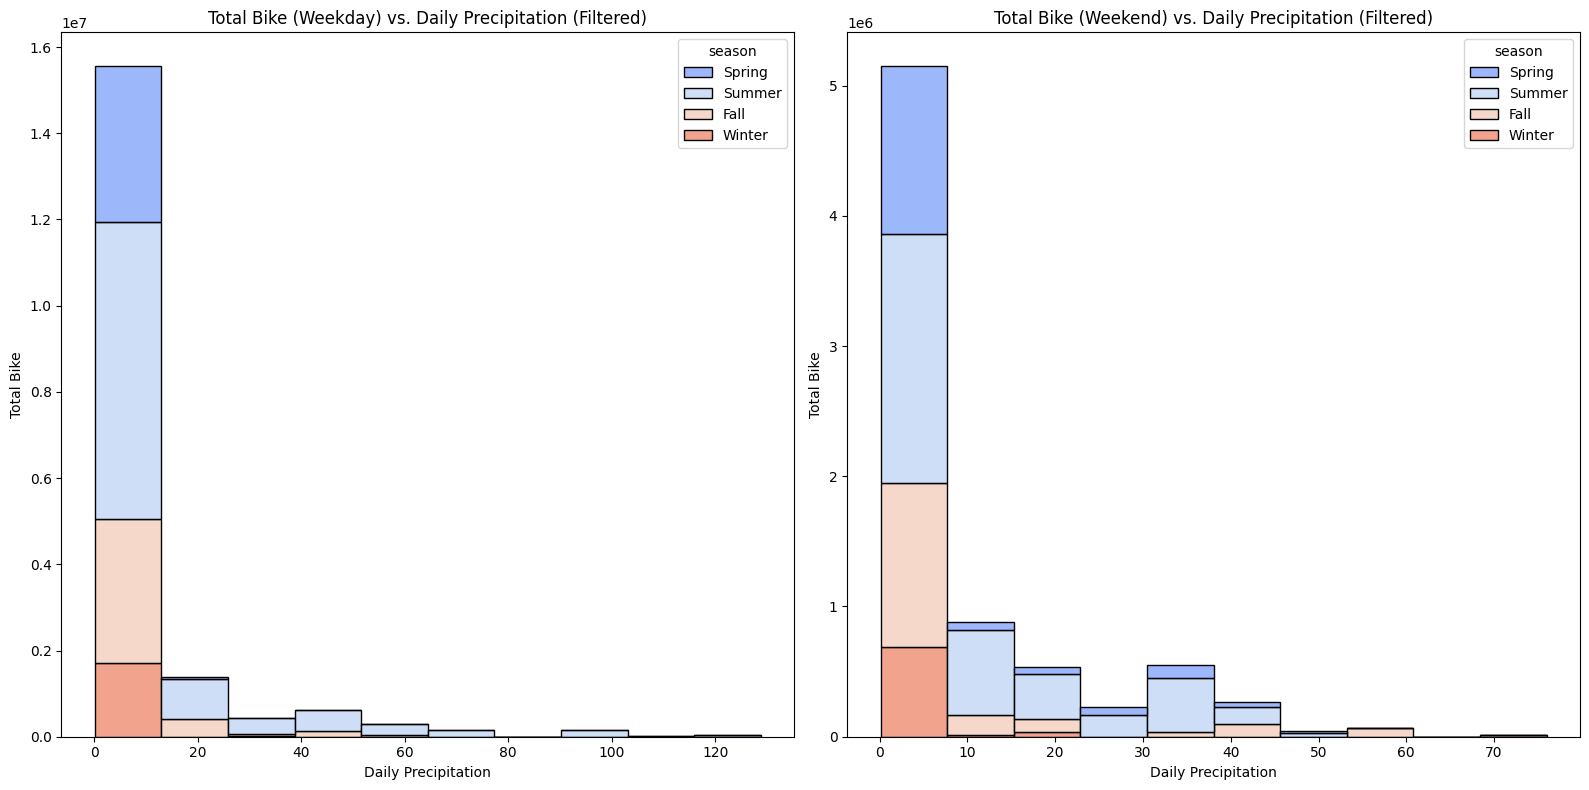

In [145]:

threshold = 0.1
bike_merge_weekday_filtered = bike_merge_weekday.query("daily_precipitation >= @threshold")
bike_merge_weekend_filtered = bike_merge_weekend.query("daily_precipitation >= @threshold")

plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
sns.histplot(data=bike_merge_weekday_filtered, x='daily_precipitation', weights='total_bike', hue='season', palette='coolwarm', multiple='stack')
plt.title('Total Bike (Weekday) vs. Daily Precipitation (Filtered)')
plt.xlabel('Daily Precipitation')
plt.ylabel('Total Bike')


plt.subplot(1, 2, 2)
sns.histplot(data=bike_merge_weekend_filtered, x='daily_precipitation', weights='total_bike', hue='season', palette='coolwarm', multiple='stack')
plt.title('Total Bike (Weekend) vs. Daily Precipitation (Filtered)')
plt.xlabel('Daily Precipitation')
plt.ylabel('Total Bike')

plt.tight_layout()
plt.show()

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


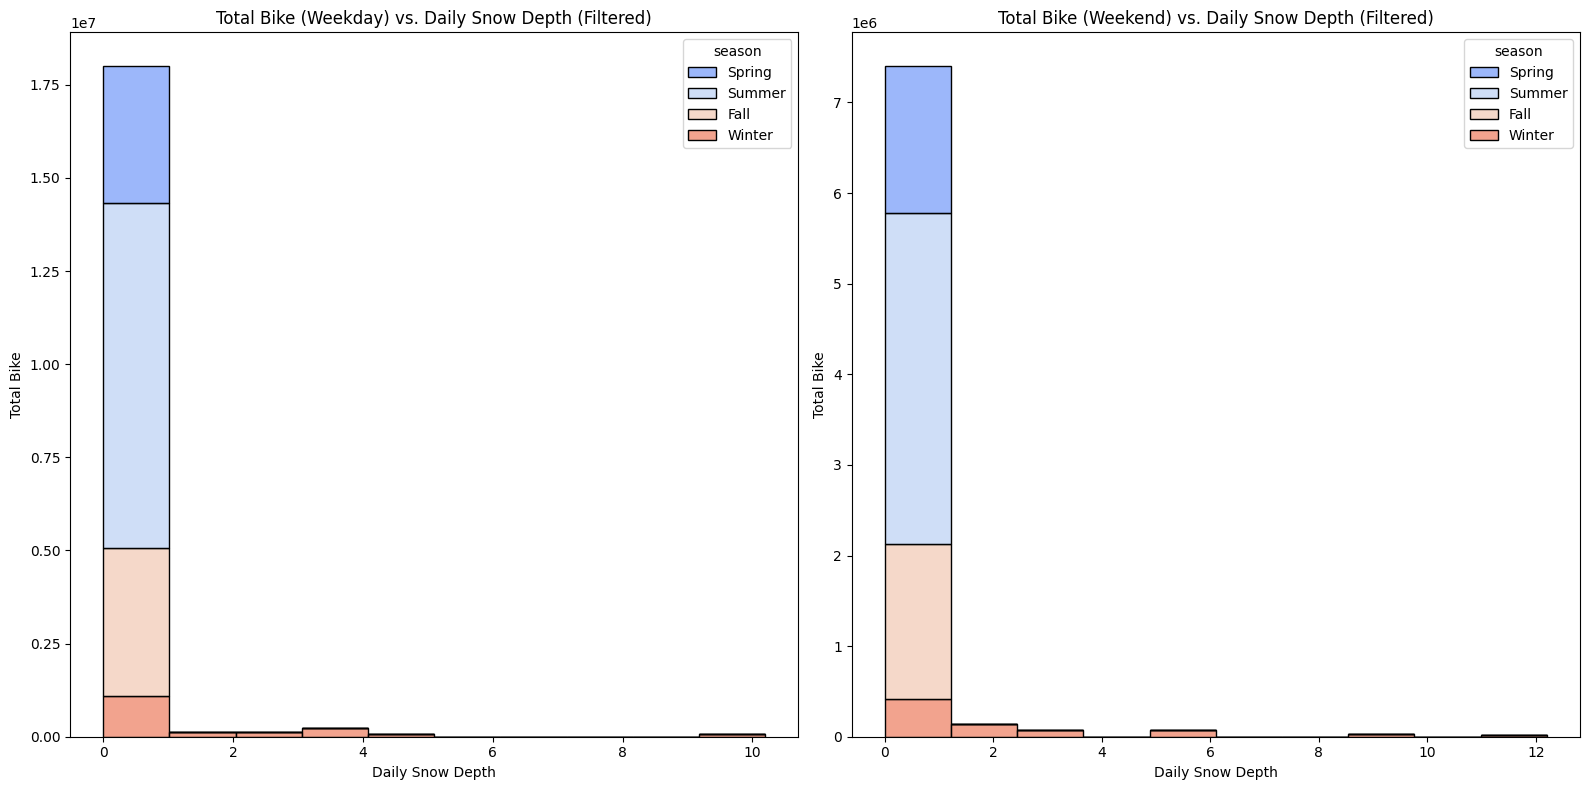

In [147]:

threshold = 0.1
bike_merge_weekday_filtered = bike_merge_weekday.query("daily_precipitation >= @threshold")
bike_merge_weekend_filtered = bike_merge_weekend.query("daily_precipitation >= @threshold")

plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
sns.histplot(data=bike_merge_weekday_filtered, x='daily_snow_depth', weights='total_bike', hue='season', palette='coolwarm', multiple='stack')
plt.title('Total Bike (Weekday) vs. Daily Snow Depth (Filtered)')
plt.xlabel('Daily Snow Depth')
plt.ylabel('Total Bike')


plt.subplot(1, 2, 2)
sns.histplot(data=bike_merge_weekend_filtered, x='daily_snow_depth', weights='total_bike', hue='season', palette='coolwarm', multiple='stack')
plt.title('Total Bike (Weekend) vs. Daily Snow Depth (Filtered)')
plt.xlabel('Daily Snow Depth')
plt.ylabel('Total Bike')

plt.tight_layout()
plt.show()